# Sales analysis for a computer games store

**Project Description:** Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. 

**The goal** is to identify the patterns that determine the success of the game sales. This will allow to bet on a potentially popular product and plan the company's advertising campaigns for the next year - 2017.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory data analysis</a></span></li><li><span><a href="#User-portrait-of-each-region" data-toc-modified-id="User-portrait-of-each-region-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>User portrait of each region</a></span></li><li><span><a href="#Hypotheses-testing" data-toc-modified-id="Hypotheses-testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hypotheses testing</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Data Preprocessing

In [135]:
# libraries
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# mute notifications
warnings.filterwarnings('ignore')

# importing dataset
data = pd.read_csv('games.csv')
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Checking basic information about dataset**

In [46]:
print(data.info())
print('')
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


This table contains data on the release of games in different years, their rating and profitability, which are contained in the following variables: 

- Name — name of particular game
- Platform — name of the platform
- Year_of_Release
- Genre — genre of particular game
- NA_sales — North American sales (millions of copies sold)
- EU_sales — sales in Europe (millions of copies sold)
- JP_sales — sales in Japan (millions of copies sold)
- Other_sales — sales in other countries (millions of copies sold)
- Critic_Score — score by critics (maximum 100)
- User_Score — score by users (maximum 10)
- Rating — rating from the international ESRB organization.

In total, 16715 observations are in the table provided for analysis. Among all the variables listed above, there are two types of data:
1. object type: variables 'Name', 'Platform', 'Genre', 'User_Score', 'Rating'
2. float64 type: variables 'Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score'. 

An initial review of the data shows the need for the following transformations:
- Converting column names to lowercase
- Changing the type of data in the 'Year_of_Releas' column

**Checking data for missing values and dublicates**

In [47]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

As can be seen, several variables at once contain missing values. Variables with game name 'Name' and genre 'Genre' contain only 2 missing values. Perhaps these are the same lines, let's check this assumption:

In [48]:
data[data['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [49]:
data[data['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The assumption was confirmed. This rows contain data neither by name, nor by genre, nor by rating, so I propose to remove them from the dataset in the future. The number of such lines is only 2 out of more than 16 thousand (approximately 0.01% of the total number of observations).

Let's also look at the lines missing 269 year values:

In [50]:
data[data['Year_of_Release'].isna()].head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Since the data is absent only in the variable reflecting the year of the game's release, but its name is present, then in the future I can try to fill in the gaps. To do this, it will be possible to take data on the year of release of the game from other lines with the same game's name.

It is also worth noting that three variables: 'Critic_Score', 'User_Score' and 'Rating' contain a significant number of missing values, what should be somehow addressed in the next step of the data preprocessing.

In addition to the missing values, let's also check for duplicates in the data:

In [51]:
data.duplicated().sum()

0

As can be seen, no obvious duplicates have been identified.

All in all, the initial review of the data has revealed the following transformations that need to be done:

1. Convert column names to lowercase for more convenience;
2. Change data type in column 'Year_of_Releas';
3. Remove lines with missing values in the variables 'Name' and 'Genre';
4. Fill in missing values in 'Year_of_Release' if possible;
5. Work with the variables 'Critic_Score', 'User_Score' and 'Rating'.

## Data Preprocessing

**Converting column names to lowercase**

In [52]:
data.columns = data.columns.str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Handling Missing Values**

Let's write a function that will fill in the missing values in the 'year_of_release' variable, taking median value of years from other lines with a similar game name:

In [53]:
data['year_of_release'] = data.groupby('name')['year_of_release'].apply(lambda x: x.fillna(x.median()))
print(len(data[data['year_of_release'].isna()]))

148


In this way, it was possible to reduce half of the 'year_of_release' missing values. The rest of the lines can be deleted, since they make up a very small part of 16+ thousand of all observations.

In [54]:
data.dropna(subset = ['year_of_release'], inplace = True)
print(len(data[data['year_of_release'].isna()]))

0


Let's do the same with the variables 'name' and 'genre', which have a very small percentage of missing values (only 2 lines):

In [55]:
data.dropna(subset = ['name'], inplace = True)
print(len(data[data['name'].isna()]))

0


In [56]:
data.dropna(subset = ['genre'], inplace = True)
print(len(data[data['genre'].isna()]))

0


**Changing data types**

As noted earlier, there is an extra decimal part in the 'year_of_release' variable. In order to bring the data to a proper form, there is need to replace the data type with integers:

In [57]:
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


**Processing of other variables**

Let's see how'critic_score', 'user_score' and 'rating' variables can be improved:

In [58]:
data['user_score'].value_counts().head(5)

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
Name: user_score, dtype: int64

In addition to the numbers that reflect the rating, the variable also contains 2394 values with the letters 'tbd'. This abbreviation means 'to be discussed', that is, the data on the ratings were not agreed. In order not to interfere with further data manipulation, let's can replace 'tbd' with Nan:

In [59]:
data['user_score'] = data['user_score'].replace('tbd', 'Nan')
data['user_score'].value_counts().head(5)

Nan    2394
7.8     324
8       288
8.2     279
8.3     253
Name: user_score, dtype: int64

It would be rational to do the same with missing values:

In [60]:
print(len(data[data['user_score'].isna()]))

6633


In [61]:
data['user_score'] = data['user_score'].fillna('Nan')
print(len(data[data['user_score'].isna()]))

0


Let's make similar transformations for the 'critic_score' variable:

In [62]:
data['critic_score'].value_counts().head(5)

70.0    253
71.0    252
75.0    243
78.0    238
80.0    236
Name: critic_score, dtype: int64

In [63]:
print(len(data[data['critic_score'].isna()]))

8492


In [64]:
data['critic_score'] = data['critic_score'].fillna('Nan')
print(len(data[data['critic_score'].isna()]))

0


Finally, let's check the values inside the 'rating' variable:

In [65]:
data['rating'].value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

According to data from Wikipedia (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board), these letters of the rating have the following interpretation:

- "E" ("Everyone") - "For everyone." Previously, this category was called "K-A" ("Kids to Adults"), so the three K-A values in the table refer to the old wording, we can replace them with E;
- "T" ("Teen") - "Teenagers" from 13 years old;
- "M" ("Mature") - "For adults" over 17 years old;
- "E10 +" ("Everyone 10 and older");
- "EC" ("Early childhood") - "For young children" from 3 years old;
- "K-A" is an obsolete version for "E"
- "RP" ("Rating Pending") - "Rating is expected"
- "AO" ("Adults Only 18+") - "Only for adults"

Based on the information provided, let's replace the values "K-A" with "E":

In [66]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'].value_counts()

E       3961
T       2930
M       1554
E10+    1412
EC         8
RP         2
AO         1
Name: rating, dtype: int64

Checking for missing values and replacin them with 'Nan':

In [67]:
print(len(data[data['rating'].isna()]))

6699


In [68]:
data['rating'] = data['rating'].fillna('Nan')
print(len(data[data['rating'].isna()]))

0


**Adding a new variable with total sales**

In [69]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,Nan,Nan,Nan,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,Nan,Nan,Nan,31.38


Summing up, during the preparation of the data for the subsequent analysis, the following steps were performed:

1. Column names have been converted to lower case;
2. The data type has been changed in the 'year_of_release' variable;
3. The missing values in the variables 'year_of_release', 'name' and 'genre' were handled;
4. Some values have been replaced in the variables 'user_score', 'critic_score' and 'rating'. In particular, the missing values and the abbreviation 'tbd' have been replaced with 'Nan'.
5. A new variable 'total_sales' has been added to reflect the total sales across all regions for each row.

## Exploratory data analysis

**How many games were released in different years. Is the data relevant for all periods?**

In [70]:
data_year = data.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'count')
data_year

,total_sales
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


As can be seen from the given data from the pivot table, in the dataframe we have information on games since 1980. But information on games in the 80s and 90s is not entirely interesting to us, since very few games were released. A noticeable jump (twice as compared to the previous year) is observed in 1995. Therefore, in the future, it will be possible to use data only from 1995.

Let's also additionally consider how long each platform was active:

In [71]:
platforms = data['platform'].unique().tolist()

df = []
first_year = []
for platform in platforms:
    platform_activeness = len(data.loc[data['platform'] == platform,'year_of_release'].unique())
    year = data.loc[data['platform'] == platform,'year_of_release'].min()
    df.append(platform_activeness)
    first_year.append(year)
    
platform_df = pd.Series(platforms, name='platform')
first_year = pd.Series(first_year, name='first_year')
df = pd.Series(df, name='platform_activeness')

platform_activeness_df = pd.concat([platform_df, first_year, df],axis=1)
platform_activeness_df.head(5)


,platform,first_year,platform_activeness
0,Wii,2006,11
1,NES,1983,12
2,GB,1988,13
3,DS,1985,11
4,X360,2005,12


The performed manipulations made it possible to create a table containing the year when platform was created, as well as the duration of its activity. This table can be used to visualize the activity of various platforms:

<AxesSubplot:title={'center':"Platforms' activeness time"}, xlabel='platform', ylabel='platform_activeness'>

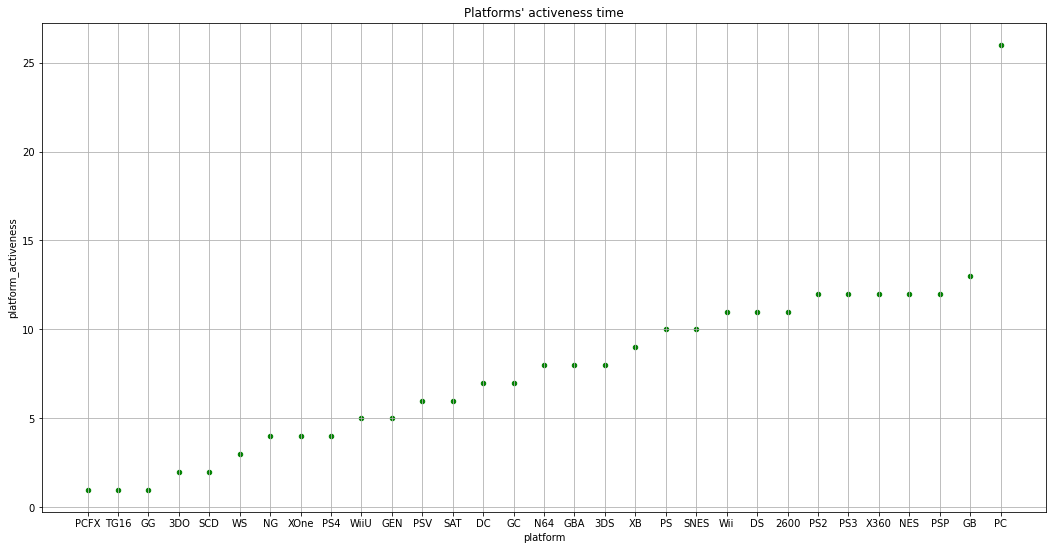

In [72]:
platform_activeness_df.sort_values(by = 'platform_activeness').plot(kind='scatter', 
                            x='platform', 
                            y='platform_activeness', 
                            grid = True,
                            figsize=(18,9),
                            title="Platforms' activeness time", 
                            color = 'green')


As can be seen from the graph, the long-lived platform is a PC (activeness around 26 yeara). The platform with the shortest period of activity - PCFX (one year of activity on market).

**Let's study how sales have changed by platform.** 

**How long does it take for a new platforms to appear and for old platforms to disappear?**

First, let's create a new dataframe containing data only after 1995:

In [73]:
data_new = data.query('year_of_release >= 1995')
data_new.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,Nan,Nan,Nan,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80


Now, using pivot table, the total sales for each platform can be calculated:

In [75]:
data_platform = data_new.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
data_platform.head(5)

,total_sales
platform,
2600,2.53
3DO,0.08
3DS,258.53
DC,15.95
DS,804.26


Let's take the top 5 platforms according to sales value and look at the distribution by year:

In [76]:
data_platform_5 = data_platform.sort_values(by = 'total_sales', ascending = False)[:5]
data_platform_5

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.26


The data in the table shows that PS2 had the highest sales. They have sold nearly 1.25 billion copies. The second place goes to the X360 platform with 9.6 billion copies sold. Third place - PS3 - 9.3 billion copies sold.

Let's look at the distribution by year:

In [77]:
top_5 = data_new.query('platform in ("PS2", "X360", "PS3", "Wii", "DS")')
top_5.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


(0.0, 3.0)

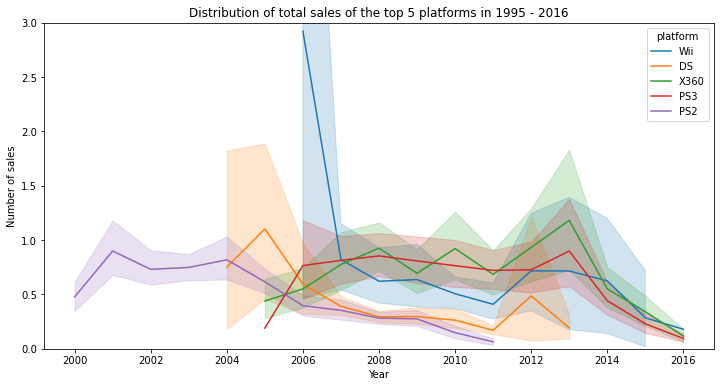

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.lineplot(x = top_5['year_of_release'], y = top_5['total_sales'], hue = top_5['platform'])
plt.title("Distribution of total sales of the top 5 platforms in 1995 - 2016")
plt.xlabel("Year")
plt.ylabel("Number of sales")
plt.ylim(0, 3)

The graph shows the total sales of the most popular gaming platforms (top-5) for the period from 1995 to 2016. The main tendency that catches the eye is that, on average, about 10 years pass from the moment the platform appears until its activity decreases:
- Wii originated and was at its peak in 2006 and came to a minimum in 2016;
- DS was active between 2004 and 2013;
- X360 entered the market in 2005 and reached its lowest sales in 2016;
- PS3 activity was observed from 2005 to 2016;
- PS2 was active from 2000 to 2011.

Over the past years, the overall growth in sales was observed in the period from 2012 to 2014 among all platforms. By 2016, sales of all of the top-5 gaming platforms were on the decline. The biggest success in history can be recorded in 2007 for the Nintento WII platform, but after 2008, the platform has become the average representative among the top-5 gaming platforms.

Based on the fact that it is necessary to build a forecast for 2017, we will take into account the following revealed facts:
- the average lifespan and activity of the platform is 10 years;
- the peak of the top platforms was in 2013;
- top platforms started their activity around 2005.

Therefore, in order for 2017 to be approximately the middle of the "viable" age of the platforms, we will set the threshold for the actual period to be 2012. So, let's "cut off" all irrelevant data:

In [83]:
# cutting data before 2012
data_2012 = data.query('year_of_release >= 2012')
data_2012.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,Nan,Nan,Nan,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,Nan,Nan,Nan,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


**Which platforms are leading in terms of sales?**

In order to identify potentially profitable platforms for the period from 2012, it is necessary to carry out all the same manipulations as in the previous paragraphs. First, let's group the data by total sales:

In [84]:
data_2012_platform = data_2012.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
data_2012_platform.head(5)

,total_sales
platform,
3DS,195.01
DS,13.21
PC,63.51
PS3,289.71
PS4,314.14


Then, let's identify the top-5 platforms of leaders for the period 2012-2016:

In [85]:
data_2012_platform_5 = data_2012_platform.sort_values(by = 'total_sales', ascending = False)[:5]
data_2012_platform_5

,total_sales
platform,
PS4,314.14
PS3,289.71
X360,237.52
3DS,195.01
XOne,159.32


As can be seen, in the period from 2012 to 2016, the top-5 gaming platforms are somewhat different from the top platforms for the entire analyzed period. So, the most successful in terms of sales is the PS4 platform, which sold just over 3 billion copies of games. In second place - PS3 - with 2.9 copies of games, and in third place - X360, which sold 2.4 copies of games. On the 4th and 5th places are new platforms: 3DS (almost 2 billion copies sold) and XOne (1.6 billion copies of games).

To see the dynamics of the rise or fall of the platforms, let's build the graph again:

In [86]:
top_5_2012 = data_2012.query('platform in ("PS4", "X360", "PS3", "3DS", "XOne")')
top_5_2012.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,Nan,Nan,Nan,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,Nan,Nan,Nan,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


For the graph, let's calculate the total sales by years in each of the top-5 gaming platforms: 

In [87]:
top_5_2012_sum = top_5_2012.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum')
top_5_2012_sum

total_sales
platform year_of_release             
3DS      2012                   51.76
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
PS3      2012                  108.28
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
X360     2012                  100.72
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

For convenience in further analysis, let's turn the index into the column names:

In [88]:
top_5_2012_sum = top_5_2012_sum.reset_index().rename_axis(None, axis = 1)
top_5_2012_sum.head(5)

,platform,year_of_release,total_sales
0,3DS,2012,51.76
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14


Now, having data on the total sales of each of the top-5 gaming platforms in each of the specific years, we can build a graph and look at the dynamics of sales for each of the platforms:

(0.0, 150.0)

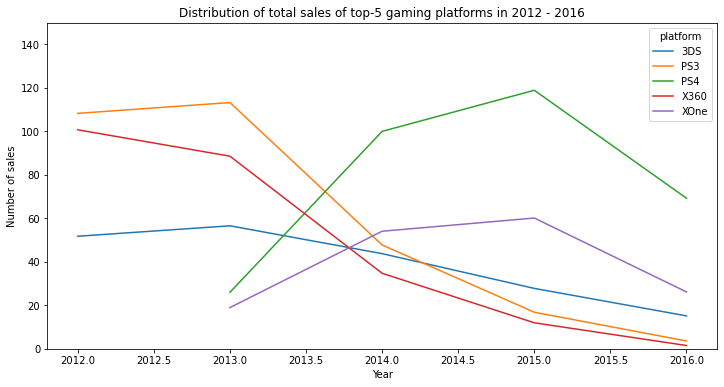

In [89]:
plt.figure(figsize=(12,6))

sns.lineplot(x = top_5_2012_sum['year_of_release'], y = top_5_2012_sum['total_sales'], hue = top_5_2012_sum['platform'])
plt.title("Distribution of total sales of top-5 gaming platforms in 2012 - 2016")
plt.xlabel("Year")
plt.ylabel("Number of sales")
plt.ylim(0, 150)


As can be seen from the graph of total sales, the 2 platforms turn out to be not very reliable, in other words, in 2017 it is not worth counting on them, since their sales for the last year under review approached zero. We are talking about platforms such as X360 and PS3. At the same time, the other three platforms, in general, demonstrate positive dynamics. PS4 and XOne, which had their peak sales in 2015, performed especially well and should definitely be counted on in 2017. We can also try to give a chance to a platform such as 3DS, which has shown a fairly gradual decline in recent years, but whose sales are still holding up at a decent level.

**Boxplot on global game sales by platform**

(-0.1, 4.0)

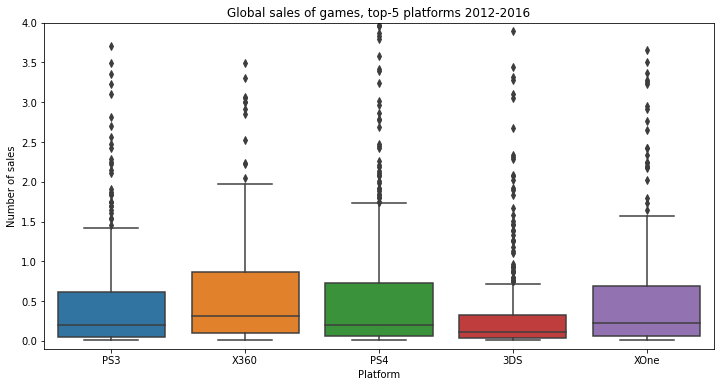

In [93]:
plt.figure(figsize=(12,6))

sns.boxplot(data = top_5_2012, x = 'platform', y = 'total_sales')
plt.title("Global sales of games, top-5 platforms 2012-2016")
plt.xlabel("Platform")
plt.ylabel("Number of sales")
plt.ylim(-0.1, 4)

Based on the given boxplots, it becomes clear that platforms such as X360 and XOne have the highest median value. Then the PS3 and PS4 are almost on a par. Among the top-5 gaming platforms, the 3DS has the smallest median value. The X360 and PS4 platforms have the largest spread in terms of sales, with the PS3 having the most positive differences. On average, platforms sell the following number of copies of their games:

- PS3: about 0.2 million;
- X360: about 0.3 million;
- PS4: about 0.2 million;
- 3DS: about 0.1 million;
- XOne: slightly over 0.2 million.

If no limit is set on the displayed number of sales, the boxplots look like this:

Text(0, 0.5, 'Number of sales')

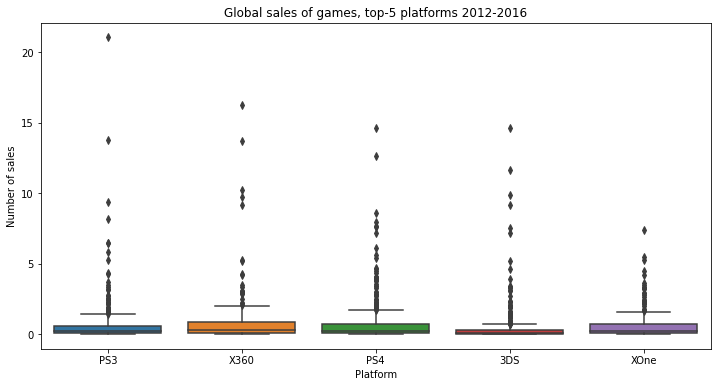

In [94]:
plt.figure(figsize=(12,6))

sns.boxplot(data = top_5_2012, x = 'platform', y = 'total_sales')
plt.title("Global sales of games, top-5 platforms 2012-2016")
plt.xlabel("Platform")
plt.ylabel("Number of sales")

It can be seen here that the most massive sales of games belong to the PS3 platforms (more than 20 million copies) and X360 (about 17 million copies).

Outliers can be attributed to critically high success rates for individual games, as opposed to "average" game sales. So, for example, the PS3 has one high-profile outlier with very high sales. Let's see what kind of outlier it is. First, let's see what values the 'total_sales' variable from the top_5_2012 dataset takes:

In [95]:
top_5_2012['total_sales'].describe()

count    1824.000000
mean        0.655537
std         1.476061
min         0.010000
25%         0.060000
50%         0.190000
75%         0.630000
max        21.050000
Name: total_sales, dtype: float64

So, the maximum value of total sales is just over 21 billion copies sold. Let's find out what kind of game it is:   

In [96]:
PS3_sales = top_5_2012.query('platform == "PS3"')
PS3_sales.max()

name               [Prototype 2]
platform                     PS3
year_of_release             2016
genre                   Strategy
na_sales                    7.02
eu_sales                    9.09
jp_sales                    0.98
other_sales                 3.96
user_score                   Nan
rating                         T
total_sales                21.05
dtype: object

As it becomes clear, such a great success belongs to the game "Prototype 2", released on the PS3 platform.

Thus, outliers observed on boxplots are the most popular games - bestsellers. If we look at the 3DS, a small boxplot and a lot of outliers can be seen. This suggests that a large part of the sales volume comes from these outliers. At the same time, the XOne has a different situation: a large box, a long 'whiskers' and few outliers. This indicates that a wide variety of games are bought from XOne, and, moreover, in considerable quantities.

**How does customer and critic reviews affect sales?**

Let's analyze these variables for the most successful platform in recent years - PS4.

In [97]:
ps4 = data_2012.query('platform == "PS4"')
ps4.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,Nan,Nan,Nan,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,Nan,Nan,Nan,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66


In order to be able to further calculate the correlation coefficient, there is need to replace the ratings data with numbers with a floating string:

In [98]:
ps4['user_score'] = ps4['user_score'].astype(float)
ps4['critic_score'] = ps4['critic_score'].astype(float)

Let's look at a scatterplot, as well as the correlation coefficient between user scores, critics scores and total sales:

Text(0.5, 1.0, 'Correlation between user scores and total sales of PS4')

<Figure size 1080x576 with 0 Axes>

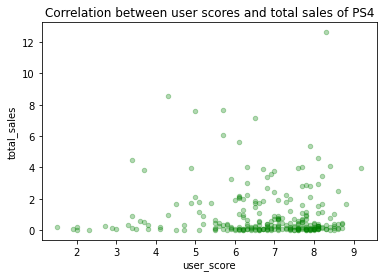

In [103]:
plt.figure(figsize=(15,8))

ps4.plot(x = 'user_score', y = 'total_sales', 
         kind = 'scatter', alpha = 0.3, color='green')
plt.title('Correlation between user scores and total sales of PS4')

Text(0.5, 1.0, 'Correlation between critic scores and total sales of PS4')

<Figure size 864x432 with 0 Axes>

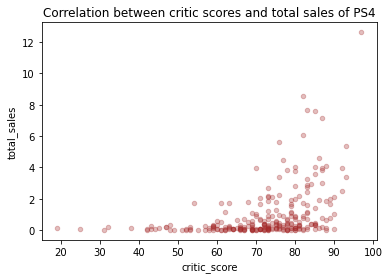

In [105]:
plt.figure(figsize=(12,6))

ps4.plot(x = 'critic_score', y = 'total_sales', 
         kind = 'scatter', alpha = 0.3, color='brown')
plt.title('Correlation between critic scores and total sales of PS4')

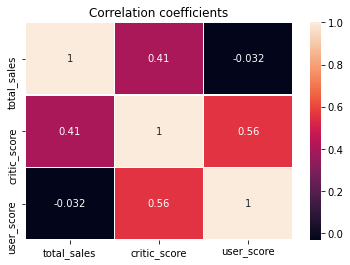

In [102]:
sns.heatmap(ps4[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('Correlation coefficients');

As can be seen from both the graph and the correlation coefficient, there is no relationship between user ratings and game sales.

When it comes to critics' scores, its relationship with game sales turns out to be significantly greater in comparison with user ratings. The correlation coefficient of 0.41 indicates presence of a connection, albeit rather weak.

**General distribution of games by genre**

To analyze the overall distribution of games by genre, let's create a new pivot table that groups sales by genre of games:

In [106]:
genre_table = data_2012.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
genre_table = genre_table.reset_index().rename_axis(None, axis=1)
genre_table = genre_table.sort_values(by = 'total_sales', ascending = False)
genre_table

,genre,total_sales
0,Action,446.41
8,Shooter,304.75
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.28
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


As can be seen from the pivot table, there are indeed four most "profitable" genres with the most sales: Action (4.5 billion game copies), Shooter (3 billion game copies), Role-Playing (almost 2 billion game copies) and Sports. (1.8 billion copies of games). As for the genres of games with low sales, the most unpopular are strategy (13 million copies in total) and puzzles (4 million copies in total).

Let's carry out similar calculations for the median indicators:

In [107]:
genre_table2 = data_2012.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median')
genre_table2 = genre_table2.reset_index().rename_axis(None, axis=1)
genre_table2 = genre_table2.sort_values(by = 'total_sales', ascending = False)
genre_table2

,genre,total_sales
8,Shooter,0.430
10,Sports,0.240
4,Platform,0.210
7,Role-Playing,0.140
6,Racing,0.140
2,Fighting,0.130
0,Action,0.120
3,Misc,0.120
9,Simulation,0.120
11,Strategy,0.080


As can be seen, there is a difference between the total median sales values: if we take into account the median sales value, then the 'Action' genre of games is only in 7th place in popularity, although it took the first place in terms of total sales. The reason may simply be a large number of games in this genre.
    
If we look at the median figures, the following genres are the most popular in terms of median sales: Shooter (on average 430 million copies of games sold), Sports (240 million copies) and Platform (210 million copies). The most unpopular are Puzzle (a total of 45 million copies sold on average) and Adventure (an average of 30 million copies of games sold).

All in all, the conducted exploratory data analysis allowed to draw several conclusions:
1. Although the data in the provided table has been collected since the 1980s, the main activity in the production of games began in 1995;
2. Between 1995 and 2016, the following platforms turned out to be the most successful in selling games:
- PS2;
- X360;
- PS3;
- WII;
- DS.
3. The average lifespan and activity of the platform is 10 years. The top platforms began their activity around 2005 and peaked in sales for them around 2013;
4. Based on the goal of the entire analysis, which is forecasting for 2017, the relevant period for subsequent analysis was designated by the framework of 2012-2016;
5. For the period 2012-2016, 3 most successful platforms were identified that provide sales potential for the next 10 years. Among them:
- PS4
- 3DS
- XOne
7. As far as the impact of ratings on the number of copies of games sold, critic scores do have a small positive impact. At the same time, user scores have nothing to do with the sales success of a particular game;
8. The most "successful" genres in terms of median copies sold are Shooter, Sports and Platform.
</div>

## User portrait of each region

**Analysis of the most popular platforms (top-5) for a user of each region (NA, EU, JP).**

**North America:**

In [108]:
na_platforms = data_2012.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
na_platforms = na_platforms.sort_values(by = 'na_sales', ascending = False)[:5]
na_platforms

,na_sales
platform,
X360,140.57
PS4,108.74
PS3,103.74
XOne,93.12
3DS,55.49


<AxesSubplot:xlabel='platform', ylabel='na_sales'>

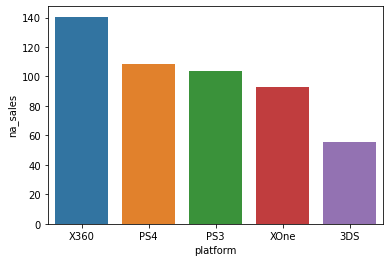

In [111]:
sns.barplot(data=na_platforms, x=na_platforms.index, 
            y=na_platforms['na_sales'])

As can be seen, the following platforms are the most popular for the North America region: X360, PS4, PS3, XOne, 3DS. To accurately draw conclusions about the difference in their shares, let's add a new variable by calculating the ratio of sales for these platforms in North America to the total number of sales in North America:

In [112]:
na_platforms['sales_share'] = na_platforms['na_sales'] / na_platforms['na_sales'].sum()
na_platforms

,na_sales,sales_share
platform,,
X360,140.57,0.280210
PS4,108.74,0.216760
PS3,103.74,0.206793
XOne,93.12,0.185624
3DS,55.49,0.110613


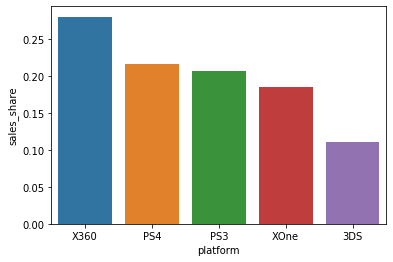

In [72]:
sns.barplot(data=na_platforms, x=na_platforms.index, y=na_platforms['sales_share'])

In terms of share, the X360 platform has the largest share of the games market in North America, with 28% of the games sold by the platform. The second place in sales of games is shared by PS4 and PS3: approximately 20% of copies of all games are sold on each of these platforms. The fourth and fifth places are occupied by XOne and 3DS: 18% and 11%, respectively.

**European Union:**

In [113]:
eu_platforms = data_2012.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
eu_platforms = eu_platforms.sort_values(by = 'eu_sales', ascending = False)[:5]
eu_platforms

,eu_sales
platform,
PS4,141.09
PS3,107.27
X360,74.89
XOne,51.59
3DS,42.83


<AxesSubplot:xlabel='platform', ylabel='eu_sales'>

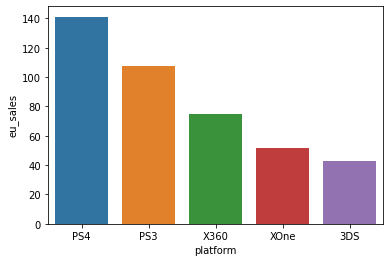

In [114]:
sns.barplot(data=eu_platforms, x=eu_platforms.index, y=eu_platforms['eu_sales'])

As for the EU, the same platforms are in the lead as in North America, but they occupy different places. For greater clarity, let's calculate the shares:

In [115]:
eu_platforms['sales_share'] = eu_platforms['eu_sales'] / eu_platforms['eu_sales'].sum()
eu_platforms

,eu_sales,sales_share
platform,,
PS4,141.09,0.337803
PS3,107.27,0.256830
X360,74.89,0.179304
XOne,51.59,0.123519
3DS,42.83,0.102545


<AxesSubplot:xlabel='platform', ylabel='sales_share'>

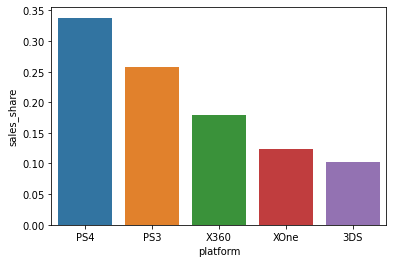

In [116]:
sns.barplot(data=eu_platforms, x=eu_platforms.index, y=eu_platforms['sales_share'])

So, 33% of the EU game market belongs to the PS4 platform, which leads the list of the region. Second place belongs to PS3, which owns 25% of all games sold in the EU. In third place is the X360 gaming platform with 17% of games sold. 4th and 5th places belong to XOne (12%) and 3DS (10%).

**Japan:**

In [117]:
jp_platforms = data_2012.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
jp_platforms = jp_platforms.sort_values(by = 'jp_sales', ascending = False)[:5]
jp_platforms

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


<AxesSubplot:xlabel='platform', ylabel='jp_sales'>

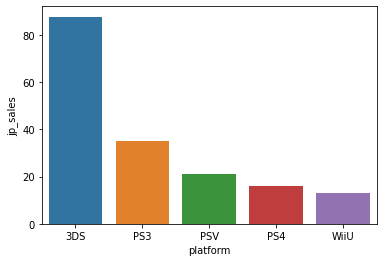

In [118]:
sns.barplot(data=jp_platforms, x=jp_platforms.index, y=jp_platforms['jp_sales'])

In [119]:
jp_platforms['sales_share'] = jp_platforms['jp_sales'] / jp_platforms['jp_sales'].sum()
jp_platforms

,jp_sales,sales_share
platform,,
3DS,87.79,0.507193
PS3,35.29,0.203882
PSV,21.04,0.121555
PS4,15.96,0.092206
WiiU,13.01,0.075163


<AxesSubplot:xlabel='platform', ylabel='sales_share'>

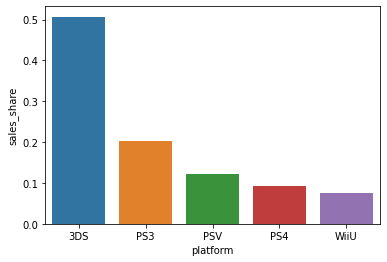

In [120]:
sns.barplot(data=jp_platforms, x=jp_platforms.index, y=jp_platforms['sales_share'])

In Japan, the set of the most popular gaming platforms differs slightly from the US and EU. In the first place is the 3DS with 87 million sold copies of games (50% of the market), in second place is the PS3 with 35 million (20% of the market). The third place is taken by the PSV platform, which was not in the top 5 of either the US or the EU. This platform has sold 21 million copies of games in Japan (12% of the market). Fourth place: PS4 with almost 16 million copies of games sold (9% of the market). Closing the top 5 is another platform that differs from the US and the EU - WiiU - with 13 million copies of games (7% of the market).

**Most popular genres (top-5)**

**North America**

In [121]:
na_genres = data_2012.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
na_genres = na_genres.sort_values(by = 'na_sales', ascending = False)[:5]
na_genres

,na_sales
genre,
Action,180.15
Shooter,144.79
Sports,81.53
Role-Playing,64.00
Misc,38.19


<AxesSubplot:xlabel='genre', ylabel='na_sales'>

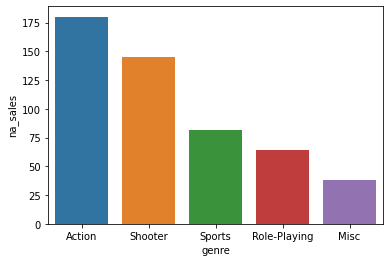

In [122]:
sns.barplot(data=na_genres, x=na_genres.index, y=na_genres['na_sales'])

**European Union**

In [123]:
eu_genres = data_2012.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
eu_genres = eu_genres.sort_values(by = 'eu_sales', ascending = False)[:5]
eu_genres

,eu_sales
genre,
Action,161.70
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


<AxesSubplot:xlabel='genre', ylabel='eu_sales'>

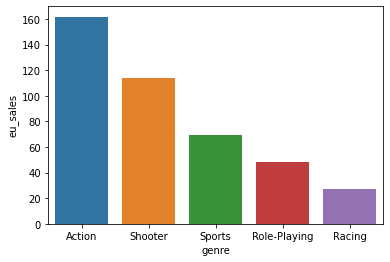

In [124]:
sns.barplot(data=eu_genres, x=eu_genres.index, y=eu_genres['eu_sales'])

**Japan**

In [125]:
jp_genres = data_2012.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
jp_genres = jp_genres.sort_values(by = 'jp_sales', ascending = False)[:5]
jp_genres

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,13.10
Simulation,10.41
Fighting,9.44


<AxesSubplot:xlabel='genre', ylabel='jp_sales'>

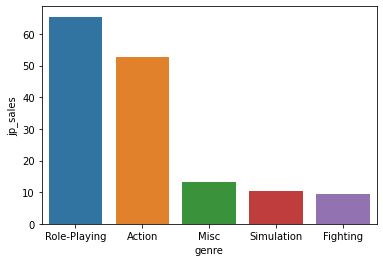

In [126]:
sns.barplot(data=jp_genres, x=jp_genres.index, y=jp_genres['jp_sales'])

As can be seen from the tables and graphs above, the US and EU have nearly the same top 5 genres. In both regions, the four first places are occupied by the following genres: Action, Shooter, Sports and Role-Playing. Only the fifth place of the rating differs: in the USA the games of the Misc genre are in the fifth place in terms of the number of sales, and in the EU - Racing. In Japan, the most popular game genres differ significantly from the US and EU in terms of sales. The top-5 genres for Japan include the following genres in the following order: Role-Playing, Action, Misc, Simulation, and Fighting.

**Does the ESRB rating affect sales in a particular region?**

**North America**

In [127]:
na_rating = data_2012.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
na_rating = na_rating.sort_values(by = 'na_sales', ascending = False)
na_rating

,na_sales
rating,
M,231.67
E,114.37
Nan,103.31
E10+,77.93
T,66.02


<AxesSubplot:xlabel='rating', ylabel='na_sales'>

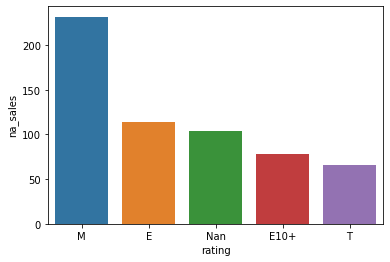

In [128]:
sns.barplot(data=na_rating, x=na_rating.index, y=na_rating['na_sales'])

As far as the ESRB rating is concerned, its relationship to game sales in the United States is as follows: the top-selling games have an 'M' status, which means games for adults over 17 years old. Between 2012 and 2016, 2.3 billion of these games were sold in the United States. Second in the ranking are games for all revenues: 1.14 billion US sales. Rounding out the top three are the games for which the rating is not determined: in total, 1 billion such games were sold in the United States during the period 2012-2016.

**European Union**

In [129]:
eu_rating = data_2012.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
eu_rating = eu_rating.sort_values(by = 'eu_sales', ascending = False)
eu_rating

,eu_sales
rating,
M,194.44
E,113.03
Nan,91.50
E10+,57.25
T,52.96


<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

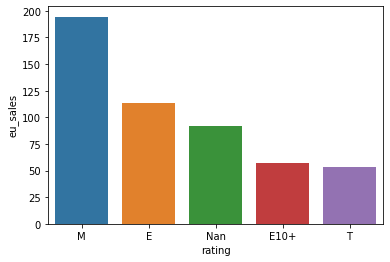

In [130]:
sns.barplot(data=eu_rating, x=eu_rating.index, y=eu_rating['eu_sales'])

In the EU, the situation with the ratings of the best-selling games is exactly the same as in the USA. Let's see which games are the best selling in Japan:

**Japan**

In [131]:
jp_rating = data_2012.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
jp_rating = jp_rating.sort_values(by = 'jp_sales', ascending = False)
jp_rating

,jp_sales
rating,
Nan,109.08
E,28.33
T,26.02
M,21.20
E10+,8.19


<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

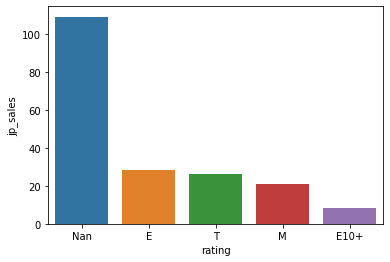

In [132]:
sns.barplot(data=jp_rating, x=jp_rating.index, y=jp_rating['jp_sales'])

In Japan, things are a little different than in the US and the EU. The best-selling games are undefined games, with over 10 billion such games sold between 2012 and 2016. The second most popular games for everyone - 2.8 billion games with this rating. Games for teens are in third place - 2.6 billion.

Summing up, the analysis made it possible to compose a user portrait of each of the regions:
1. **In the US**, the X360 platform has the largest share of the games market (28% of the games sold belong to this platform). The second place in sales of games is shared by PS4 and PS3: approximately 20% of copies of all games are sold on each of these platforms. The most favorite genres of games among US residents are Action, Shooter, Sports. If we talk about the ratings of games, then in this region, games for adults are most often bought, as well as games for all ages.
2. **In the EU**, the most popular gaming platforms are as follows: 33% of the EU games market belongs to the PS4 platform, which leads the region's list. Second place belongs to PS3, which owns 25% of all games sold in the EU. In third place is the X360 gaming platform with 17% of games sold. As for the genre of the best-selling games in the EU, they do not differ from the USA. The three most popular are Action, Shooter and Sports. The same goes for game ratings. Their popularity in terms of sales of games does not differ from that of the United States: the most popular ratings are games for adults and games for all ages.
3. **Japan** significantly differs from the US and the EU in all of the analyzed indicators. So, in terms of gaming platforms, in the first place is 3DS with 87 million sold copies of games (50% of the market), in second place is PS3 with 35 million (20% of the market). The third place is taken by the PSV platform, which was not in the top 5 of either the US or the EU. The top 5 genres for Japan include the following genres in the following order: Role-Playing, Action, Misc, Simulation, and Fighting. In terms of ratings, the top-selling games in Japan have no rating. In second place are games for all ages, and in third place are teenage games.

## Hypotheses testing

**Average user ratings for Xbox One and PC platforms are the same**

To begin with, let's formulate a null and an alternative hypothesis:

**H0:** Average user ratings for Xbox One and PC platforms are the same

**H1:** Average user ratings vary between Xbox One and PC platforms

Since the hypotheses formulated relate to the means of two samples, a two-tailed t-test is applicable. Let's take the threshold value of 0.05 as the significance level.

As first step, there is need to change the type of the variable for further analysis, and also remove the missing values in the 'user_score' variable.

In [133]:
data_2012['user_score'] = data_2012['user_score'].astype(float)

In [134]:
data_2012.dropna(subset = ['user_score'], inplace = True)
print(len(data_2012[data_2012['user_score'].isna()]))

0


In [136]:
xbox = data_2012.query('platform == "XOne"')['user_score']
pc = data_2012.query('platform == "PC"')['user_score']

Let's check if there are missing values that can mess up the calculations:

In [137]:
xbox.isna().sum()

0

In [138]:
pc.isna().sum()

0

There are no missing values, so the hypothesis testing can be performed:

In [139]:
alpha = 0.05

results = st.ttest_ind(xbox, pc, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Reject H0')
else:
    print('Cannot reject H0')

p-value: 0.6206366351489678
Cannot reject H0


So, as can be seen, the p-value turns out to be much higher than the given one, so we were unable to reject H0. In this regard, it cannot be said that the user ratings of the Xbox One and PC platforms differ at a statistically significant level. Therefore, they do not differ.

**The average user ratings for the Action and Sports genres are different.**

The formulation of the null and alternative hypotheses:

**H0:** Average user ratings for Action and Sports genres do not differ

**H1:** Average user ratings for Action and Sports genres differ

Since the hypotheses formulated relate to the means of two samples, a two-tailed t-test is applicable. Let's take the threshold value of 0.05 as the significance level.

In [140]:
action = data_2012.query('genre == "Action"')['user_score']
sports = data_2012.query('genre == "Sports"')['user_score']

alpha = 0.05

results = st.ttest_ind(action, sports, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Reject H0')
else:
    print('Cannot reject H0')

p-value: 2.337200239591976e-20
Reject H0


As can be seen, the p-value takes on a very small value, so we cannot accept H0. We conclude that the user ratings of action games and sports competitions differ statistically significantly.

## Conclusion

In the first two parts of the work, various manipulations were carried out with the obtained data:

- missing values have been filled where possible;
- some lines with missing values were removed;
- column names have been changed to lowercase;
- where necessary, the data type has been changed;
- the values of the variables with ratings were processed.
All this made it possible to prepare the data for subsequent analysis. 

Exploratory data analysis has shown the following:
- The main activity in the production of games began in 1995;
- For the period from 1995 to 2016, the following platforms turned out to be the most successful in selling games: PS2, X360, PS3, WII, DS
- The average lifespan and activity of the platform is 10 years. - Top platforms began their activity around 2005, and peak sales for them reached around 2013;
- Based on the goal of the entire analysis, which is forecasting for 2017, the current period for subsequent analysis was designated by the framework of 2012-2016;
- For the period 2012-2016, 5 most successful platforms were identified. Among them, only 3 are serving potential in sales for the next 10 years: PS4, 3DS and XOne;
- If we talk about the most successful genres in the last 5 years until 2017, then these are Shooter, Sports and Platform, in which it would be worth investing in 2017. The least attention should be paid to Puzzle and Adventure;
- As far as the impact of ratings on the number of copies of games sold, critics' scores do have a small positive impact. At the same time, user scores have nothing to do with the sales success of a particular game.

Analysis of the data separately for each of the three regions (USA, EU and Japan) showed the characteristics of each of them in relation to the consumption of games:

- **In the US**, the X360 platform has the largest share of the games market (28% of games sold belong to this platform). The second place in sales of games is shared by PS4 and PS3: approximately 20% of copies of all games are sold on each of these platforms. The most favorite genres of games among US residents are Action, Shooter, Sports. If we talk about the ratings of games, then in this region, games for adults are most often bought, as well as games for all ages.
- **In the EU**, the most popular gaming platforms are as follows: 33% of the EU game market belongs to the PS4 platform, which leads the region's list. Second place belongs to PS3, which owns 25% of all games sold in the EU. In third place is the X360 gaming platform with 17% of games sold. As for the genre of the best-selling games in the EU, they do not differ from the USA. The three most popular are Action, Shooter and Sports. The same goes for game ratings. Their popularity in terms of sales of games does not differ from that of the United States: the most popular ratings are games for adults and games for all ages.
- **Japan** differs significantly from the US and EU in all of the analyzed indicators. So, in terms of gaming platforms, in the first place is 3DS with 87 million sold copies of games (50% of the market), in second place is PS3 with 35 million (20% of the market). The third place is taken by the PSV platform, which was not in the top 5 of either the US or the EU. The top 5 genres for Japan include the following genres in the following order: Role-Playing, Action, Misc, Simulation, and Fighting. In terms of ratings, the top-selling games in Japan have no rating. In second place are games for all ages, and in third place are teenage games.

Returning to the main goal of the study - to identify the patterns that determine the success of the game for determining a potentially popular product and planning an advertising campaign for 2017, the following recommendations can be made:
1. In the US and EU, the most reliable platform is the PS4. Genres: Action, Shooter and Sports. In terms of age, these regions are the best selling games for adults and universal games for all ages.
2. For Japan, it is worth doing a separate campaign, since the sale of games in this region is significantly different from the US and the EU. Here, the most successful gaming platform in recent years is 3DS, which occupies 1/2 of the total games market. The most profitable game genres for Japan are Role-Playing and Action. As for the age rating for Japan, it is worth doing a separate analysis of this issue, since the best-selling games in Japan are classified in an undefined rating.